In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = load_iris()

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df["target"] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [14]:
setosa = df.iloc[:50]
versicolor = df.iloc[50:100]
verginica = df.iloc[100:]

In [9]:
setosa.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [15]:
versicolor.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1


In [11]:
verginica.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2


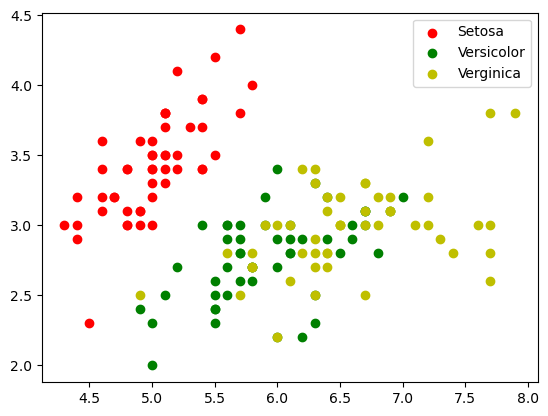

In [17]:
plt.scatter(setosa["sepal length (cm)"],setosa["sepal width (cm)"],c = "r")
plt.scatter(versicolor["sepal length (cm)"],versicolor["sepal width (cm)"],c = "g")
plt.scatter(verginica["sepal length (cm)"],verginica["sepal width (cm)"],c = "y")
plt.legend(["Setosa", "Versicolor", "Verginica"])
plt.show()

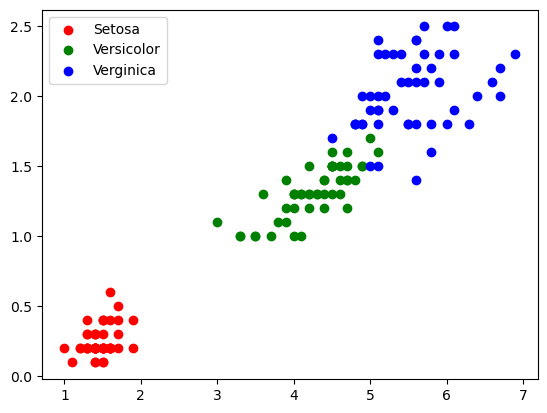

In [18]:
plt.scatter(setosa["petal length (cm)"], setosa["petal width (cm)"], c ="r")
plt.scatter(versicolor["petal length (cm)"], versicolor["petal width (cm)"], c ="g")
plt.scatter(verginica["petal length (cm)"], verginica["petal width (cm)"], c ="b")
plt.legend(["Setosa", "Versicolor", "Verginica"])
plt.show()

In [19]:
X = iris.data
y = iris.target

In [20]:
estimator = LogisticRegression()

In [21]:
k = 5

In [22]:
accuracy_score = cross_val_score(estimator,X,y, cv = k)

In [23]:
for i,score in enumerate(accuracy_score):
    print(f"For{i+1} Fold score is {score}")

For1 Fold score is 0.9666666666666667
For2 Fold score is 1.0
For3 Fold score is 0.9333333333333333
For4 Fold score is 0.9666666666666667
For5 Fold score is 1.0


In [24]:
mean_score = np.mean(accuracy_score)
print(f"Mean accuracy score is {mean_score:.2f}")

Mean accuracy score is 0.97


In [26]:
name = "Dipali"
age = 22

print("Name is",name, "Age is",age)
print(f"Name is {name} Age is {age}")
print("Name is {} Age is {}".format(name, age))

Name is Dipali Age is 22
Name is Dipali Age is 22
Name is Dipali Age is 22


# ROC AUC CURVE

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

In [28]:
y = y[:100]
X = X[:100]

In [30]:
estimator.fit(X, y)
y_pred_prob = estimator.predict_proba(X)
new_y_pred = y_pred_prob[:,1]

In [31]:
fpr, tpr, th = roc_curve(y, new_y_pred)
fpr
tpr

array([0.  , 0.02, 1.  , 1.  ])

In [32]:
auc = roc_auc_score(y, new_y_pred)

In [33]:
auc

1.0

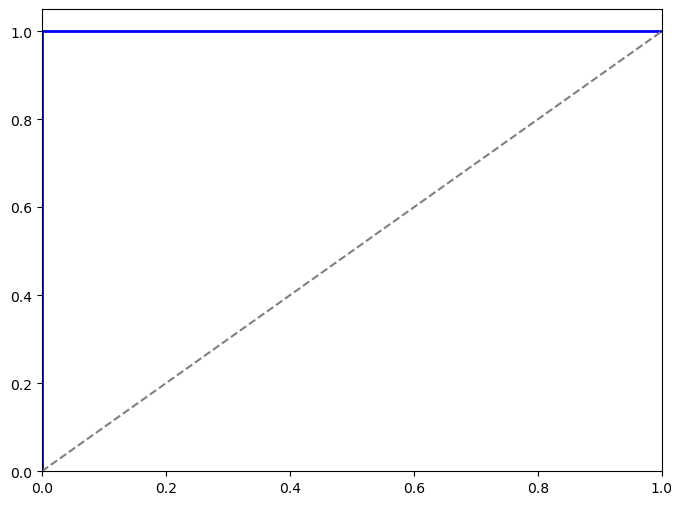

In [34]:
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, c = "b", lw = 2, label = f"ROC curve (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], c = "gray", linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()